In [38]:
!pip install matplotlib
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Set up the image size and batch size
img_size = (224, 224)  # Resize the images to (224, 224)
batch_size = 32

# Load the training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\saite\OneDrive\Desktop\Augmented_Datasets\train",  # Path to your train folder
    image_size=img_size,         # Resize images
    batch_size=batch_size,       # Set the batch size
    label_mode='int'             # Labels are integers
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\saite\OneDrive\Desktop\Augmented_Datasets\val",    # Path to your val folder
    image_size=img_size,         # Resize images
    batch_size=batch_size,       # Set the batch size
    label_mode='int'             # Labels are integers
)

# Print class names to check the number of output classes
print(f"Class Names: {train_dataset.class_names}")

# Create a CNN model
model = models.Sequential([
    # Input layer and convolutional layers
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize image values to [0, 1]
    layers.Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer with 32 filters
    layers.MaxPooling2D((2, 2)),  # Max pooling layer to reduce dimensionality

    layers.Conv2D(64, (3, 3), activation='relu'),  # More convolutional layers
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer to convert 2D data to 1D for fully connected layers
    layers.Flatten(),

    # Fully connected layers (dense layers)
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_dataset.class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',  # Optimizer for training
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Evaluate accuracy during training
)

# Model summary to view architecture
model.summary()


Found 346 files belonging to 10 classes.
Found 40 files belonging to 10 classes.
Class Names: ['k._l._rahul', 'kane_williamson', 'kemar_roach', 'kuldeep_yadav', 'kusal_perera', 'lasith_malinga', 'lungi_ngidi', 'marcus_stoinis', 'mitchell_starc', 'moeen_ali']


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(
    train_dataset,  # Training dataset
    validation_data=val_dataset,  # Validation dataset
    epochs=10,  # Set the number of epochs (iterations over the entire dataset)
    batch_size=batch_size  # Batch size for training
)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1323 - loss: 3.2258 - val_accuracy: 0.1000 - val_loss: 2.2834
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.1637 - loss: 2.2428 - val_accuracy: 0.1750 - val_loss: 2.3358
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2219 - loss: 2.1686 - val_accuracy: 0.2250 - val_loss: 1.9927
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3723 - loss: 1.7921 - val_accuracy: 0.4250 - val_loss: 1.8059
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5120 - loss: 1.5226 - val_accuracy: 0.5250 - val_loss: 1.4021
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5727 - loss: 1.2681 - val_accuracy: 0.7750 - val_loss: 1.0209
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7703 - loss: 0.8452 - val_accuracy: 0.8500 - val_loss: 0.6633
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8049 - loss: 0.6238 - val_accuracy: 0.9250 - val_loss:

In [41]:
# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.9729 - loss: 0.1737
Validation Accuracy: 97.50%
Validation Loss: 0.1742


In [42]:
# Use model.predict() to make predictions on new data
predictions = model.predict(val_dataset)  # Use the validation dataset or any other dataset
print(predictions)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step
[[8.15983534e-01 9.92695335e-03 2.28987820e-03 1.21598512e-01
  3.63673898e-04 3.46684654e-04 4.57692565e-03 2.06163041e-02
  4.23500664e-04 2.38740034e-02]
 [2.32496485e-03 7.30997231e-03 8.72088887e-04 1.34780556e-01
  4.93628206e-03 2.21608998e-03 6.97300944e-04 8.44383895e-01
  7.67441175e-04 1.71135366e-03]
 [3.61476152e-04 1.96131310e-04 3.50329246e-05 4.51844942e-04
  9.96863365e-01 1.81674026e-04 1.00488642e-05 8.35881685e-04
  4.70824481e-04 5.93726872e-04]
 [1.76895428e-02 1.40078622e-03 4.08488652e-03 2.72559538e-03
  1.06968265e-03 6.64974237e-03 5.86150680e-03 2.01724804e-04
  1.33791275e-03 9.58978653e-01]
 [4.94161015e-03 4.38396307e-03 4.90464095e-04 8.98413360e-01
  1.88410729e-02 2.12970912e-03 4.37319803e-04 5.90743758e-02
  8.26359261e-03 3.02443537e-03]
 [7.62142986e-02 4.52353648e-04 3.60774398e-02 2.01641425e-01
  2.91318865e-04 6.55854642e-01 1.41305736e-05 2.79626567e-02
  3.96007053e-05 1.45207497e-03]
 [5.41454065e-04 8.

In [43]:

model.save('my_trained_model.keras')



In [44]:
# Load the model from the new Keras format
loaded_model = tf.keras.models.load_model('my_trained_model.keras')



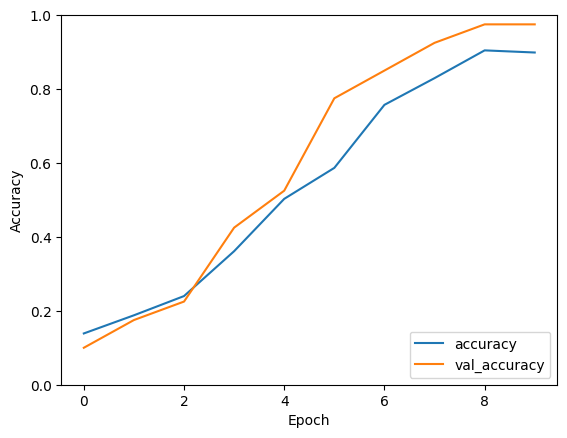

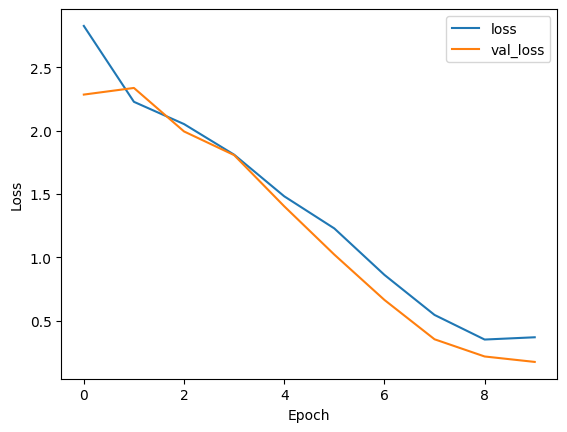

In [45]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
